In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

sns.set()

In [7]:
df = pd.read_csv('Application_vs_enrolment.csv')

df

,Month,Application Submitted,Enrollments
0,May 2023,476,102
1,June 2023,2143,239
2,July 2023,1723,241
3,August 2023,3096,222
4,September 2023,4340,200
5,October 2023,11360,341
6,November 2023,13896,517
7,December 2023,7355,413
8,January 2024,7060,446
9,February 2024,3320,275


## Correlation Analysis

In [9]:
# Calculate the correlation between Marketing Spend and Enrollments
corr_submitted_enroll, _ = pearsonr(df['Application Submitted'], df['Enrollments'])
print(f"Correlation between Applications Submitted and Enrollments: {corr_submitted_enroll:.2f}")

Correlation between Applications Submitted and Enrollments: 0.75


## Visualization

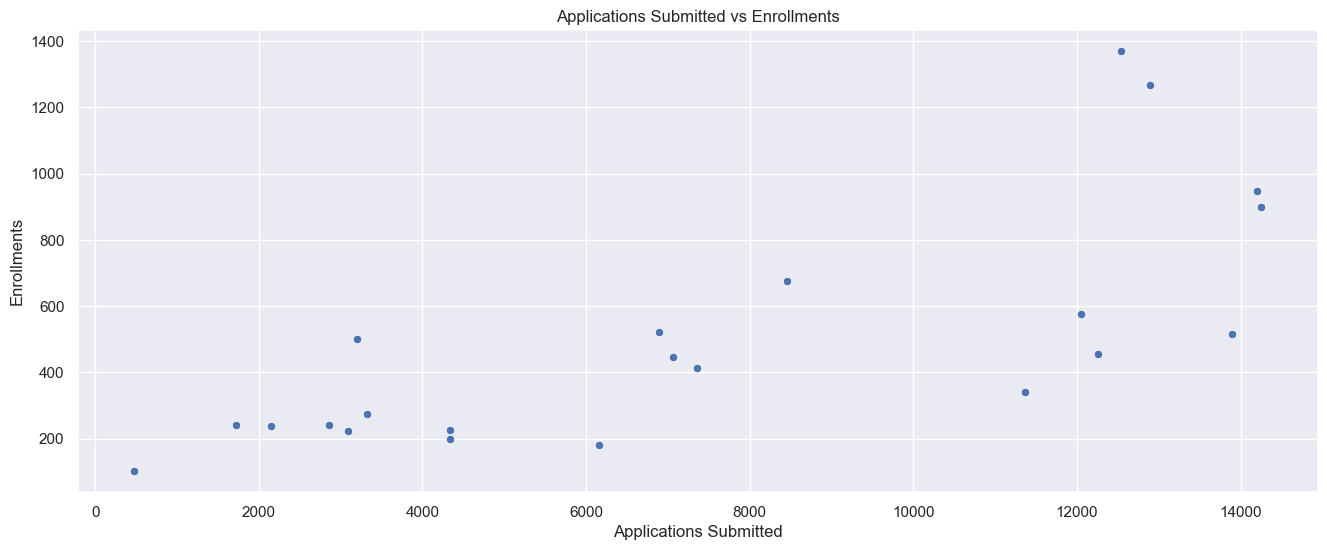

In [19]:
# Create new columns for Marketing Spend and Sales in Millions
#df['Marketing Sp'] = df['Marketing Spend (#)'] / 1_000_000
#df['Sales (Millions)'] = df['Sales'] / 1_000_000

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(figsize=(16, 6))

# Scatter plot for Applications Submitted vs Enrollments 
sns.scatterplot(x='Application Submitted', y='Enrollments', data=df, ax=ax)  # Use ax instead of axes[0]
ax.set_title('Applications Submitted vs Enrollments')
ax.set_xlabel('Applications Submitted')
ax.set_ylabel('Enrollments')

plt.show()


 ## Hypothesis Testing (Statistical Significance)

#### Pearson Correlation Test:
- It computes the Pearson correlation coefficient (r) and the corresponding p-value.
- The null hypothesis (H₀) is that there is no linear relationship (correlation) between the variables (i.e., r = 0).
- The alternative hypothesis (H₁) is that there is a significant linear relationship between the variables (i.e., r != 0).

#### P-value Interpretation:
- If the p-value is less than Significance Level (α) `(where α = 0.05)`, it implies that the correlation is statistically significant and **we reject the null hypothesis.**
- If the p-value is greater than Significance Level (α) `(where α = 0.05)`, it means the correlation is not statistically significant, and **we fail to reject the null hypothesis.**

#### For Applications Submitted vs Enrollments:
- Null Hypothesis (H₀): There is no correlation between Applications Submitted and Enrollments. In other words, an increase in the number of applications submitted in a month does not lead to an increase (or decrease) in enrollments for the month to which the application was submitted.

- Alternative Hypothesis (H₁): There is a significant correlation between Applications Submitted and Enrollments. This means that changes in applications submitted will result in changes changes in enrollments.

In [28]:
# Hypothesis Testing: Applications Submitted vs Enrollments
corr_submitted_enroll, p_value_enroll = pearsonr(df['Application Submitted'], df['Enrollments'])
print(f"Applications Submitted vs Enrollments: Correlation: {corr_submitted_enroll:.2f}, P-value: {p_value_enroll:.4f}")

# Interpretation of P-values
if p_value_enroll < 0.05:
    print("The correlation between Marketing Spend and Enrollments is statistically significant.")
else:
    print("The correlation between Marketing Spend and Enrollments is not statistically significant.")

Applications Submitted vs Enrollments: Correlation: 0.75, P-value: 0.0001
The correlation between Marketing Spend and Enrollments is statistically significant.


#### Insight
- P-value: 0.0001
- Significance Level (α): 0.05

#### Interpretation:
- Since the p-value (0.0001) is `less than 0.05`, **we reject the null hypothesis.**
- This means there is statistically significant correlation between applications submitted and enrollments at the 5% significance level.
- A very low p-value (close to 0) suggests a strong association between the two variables, meaning that as applications submitted increase, enrollments are also likely to increase.


#### Conclusion:
- There is a statistically significant correlation between applications submitted and enrollments.
- Based on this analysis, we conclude that an change in applications submitted is significantly associated with a change in enrollments.
- Therefore, we reject the null hypothesis and accept the alternative hypothesis that a relationship exists.

## Linear Regression using `statsmodels`

We use statsmodels to create a linear regression model for both `Applications Submitted` vs `Enrollments`.

### Applications Submitted vs Enrollments Regression

In [60]:
X = df['Application Submitted']
Y_enrol = df['Enrollments'] 

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the OLS regression model
model_enroll = sm.OLS(Y_enrol, X).fit()

# Print the summary of the regression model
print(model_enroll.summary())

                            OLS Regression Results                            
Dep. Variable:            Enrollments   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     25.02
Date:                Sun, 02 Mar 2025   Prob (F-statistic):           6.84e-05
Time:                        10:16:12   Log-Likelihood:                -150.50
No. Observations:                  22   AIC:                             305.0
Df Residuals:                      20   BIC:                             307.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    77.16

In [63]:
model_enroll.bse

const                    97.483880
Application Submitted     0.011118
dtype: float64

In [65]:
rmse = np.sqrt(model_enroll.mse_resid)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 237.36472841091827


In [69]:
mae = np.mean(np.abs(residuals))
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 158.78008407994992


#### Model Error Analysis

##### **1. Standard Errors of Coefficients**
- The standard error for the **intercept** (constant) is **97.48**, which indicates the variability of the estimated intercept.
- The standard error for the **Application Submitted** coefficient is **0.0111**, suggesting a low level of uncertainty in this estimate.

##### **2. Root Mean Squared Error (RMSE)**
- RMSE = **237.36**  
- RMSE represents the average magnitude of errors in predictions, measured in the same units as the dependent variable (**Enrollments**).  
- A lower RMSE value indicates better model performance. However, 237.36 suggests that, on average, the model's predictions deviate from actual enrollments by around **237 enrollments**. 

##### **Interpretation**
- The model explains some of the variance but may need improvements, such as including additional predictors, transforming variables, or using a more complex model.

##### **Next Steps**
- **Check R²:** Evaluate how much variance in enrollments is explained by applications submitted.
- **Check Residual Plots:** Identify any patterns that indicate model misspecification.
- **Consider Additional Predictors:** Other factors (e.g., marketing spend, quality of applications submitted, seasonality) may improve accuracy.


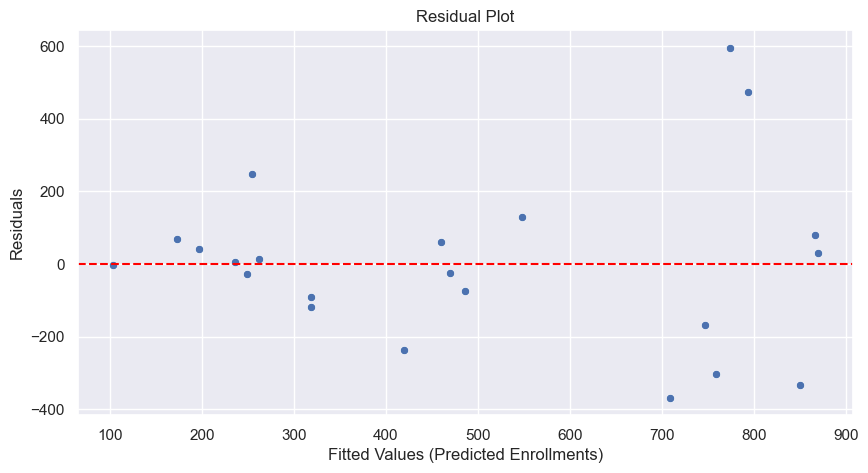

In [74]:
# Get residuals (actual - predicted values)
residuals = model_enroll.resid

# Scatter plot of residuals
plt.figure(figsize=(10, 5))
sns.scatterplot(x=model_enroll.fittedvalues, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Add a reference line at 0
plt.xlabel('Fitted Values (Predicted Enrollments)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.show()


#### Interpretation of the Residual Plot
- Randomly scattered points around zero? ✅ The model's errors are randomly distributed → good sign!
- Patterns or trends? ❌ If you see a curved or non-random shape, your model might be missing important variables.
- Variance increases/decreases? 🔼🔽 If residuals spread out more as predictions increase, it suggests heteroscedasticity, meaning the model might not be stable across all values.

#### Regression Equation

The general form of a simple linear regression equation is:
\
y=β0 ​ + β1​x

Where:
- \( y \) = Dependent variable (Enrollments)
- \( x \) = Independent variable (Applications Submitted)
- \( β0 \) = Intercept (Constant)
- \( β1 \) = Coefficient for the independent variable

From the regression results:

- **Coefficient for Applications Submitted** (β1) = **0.0556**
- **Intercept (Constant)** (β0)) = **77.1634**

Thus, the regression equation is:
\
Enrollments = (0.0556 * {Applications Submitted}) + 77.1634




#### Regression Line

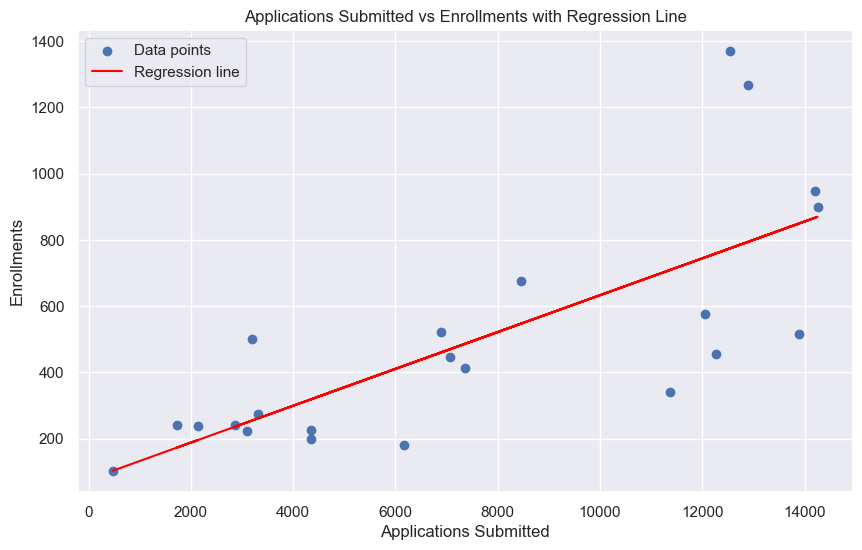

In [58]:
# Scatter plot and regression line for Applications Submitted vs Enrollments
plt.figure(figsize=(10, 6))
plt.scatter(df['Application Submitted'], df['Enrollments'], label="Data points")
plt.plot(df['Application Submitted'], model_enroll.predict(sm.add_constant(df['Application Submitted'])), 
         color='red', label="Regression line")
plt.title('Applications Submitted vs Enrollments with Regression Line')
plt.xlabel('Applications Submitted')
plt.ylabel('Enrollments')
plt.legend()
plt.grid(True)
plt.show()